In [2]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
device = torch.device('cuda') if (torch.cuda.is_available()) else torch.device('cpu')
device

device(type='cpu')

In [4]:
complete = pd.read_csv('data/Full_SPacific2.csv')
# complete = pd.read_csv('/kaggle/input/spacific3/Full_SPacific2.csv')
complete

,Unnamed: 0,folderidx,float,profileidx,year,month,day,lat,lon,nlat,...,prev3_ts5,prev3_ts6,prev3_ts7,prev3_ts8,prev3_dy,prev3_dx,ssh1,ssh2,bath1,bath2
0,10,0.0,1901058.0,337.0,2017.0,3.0,4.0,-49.5448,159.7474,-49.0256,...,-0.646798,0.461585,0.246950,-0.078740,-0.2956,-0.1431,0.053500,1.000000,0.277969,-1.000000
1,11,0.0,1901058.0,360.0,2017.0,10.0,20.0,-47.9904,163.5339,-47.4761,...,-0.364070,0.543888,0.226426,0.262563,-0.2163,-0.7417,-0.151312,1.000000,0.225017,-1.000000
2,12,0.0,1901058.0,361.0,2017.0,10.0,30.0,-47.4761,164.1107,-47.3438,...,-0.374211,0.566200,0.047431,0.412140,0.0083,-0.3137,-0.179385,-1.000000,-0.652355,-1.000000
3,13,0.0,1901058.0,362.0,2017.0,11.0,9.0,-47.3438,163.2821,-47.0608,...,-0.453763,0.278568,0.342156,0.049035,-0.1735,-0.2985,-0.835740,-1.000000,0.262931,-1.000000
4,14,0.0,1901058.0,363.0,2017.0,11.0,19.0,-47.0608,163.9069,-46.2846,...,-0.515990,0.227485,0.321838,0.073723,0.5143,0.5768,-0.477094,-1.000000,-0.314455,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61134,138220,10.0,3902389.0,134.0,2022.0,8.0,30.0,-20.1230,-109.7890,-20.0910,...,1.104784,0.609725,-0.550078,-0.118207,0.0450,0.0800,-0.551358,1.000000,-1.000000,0.129248
61135,138221,10.0,3902389.0,135.0,2022.0,9.0,9.0,-20.0910,-109.6610,-20.0180,...,1.169894,0.763656,-0.693145,0.005258,0.0200,0.0900,-0.028281,1.000000,-1.000000,0.230699
61136,138222,10.0,3902389.0,136.0,2022.0,9.0,19.0,-20.0180,-109.5840,-19.8910,...,1.127813,0.338755,-0.503737,-0.133409,-0.0070,0.1280,-0.086688,1.000000,-1.000000,0.266634
61137,138223,10.0,3902389.0,154.0,2023.0,3.0,17.0,-20.2200,-108.6730,-20.0560,...,1.310212,0.852507,-0.832035,0.113673,-0.3030,-0.0640,1.000000,-0.146425,-1.000000,0.132655


In [5]:
data = complete
# find correlation between prev_dx and dx
prev_dx = data.get('prev_dx')
dx = data.get('dx')
prev_dy = data.get('prev_dy')
dy = data.get('dy')
dx.corr(prev_dx), dy.corr(prev_dy)

(0.5184268981674282, 0.3533978379519491)

In [6]:
data = complete
data = data.assign(total_disp=np.sqrt(dx**2 + dy**2))
data = data[data.get('total_disp') < 1]
# find correlation between prev_dx and dx
prev_dx = data.get('prev_dx')
dx = data.get('dx')
prev_dy = data.get('prev_dy')
dy = data.get('dy')
dx.corr(prev_dx), dy.corr(prev_dy)

(0.5143756652284844, 0.5170038751989349)

In [7]:
# chosen_params = ['bath1', 'bath2', 'prev_dy', 'prev_dx', 'dy', 'dx']
chosen_params = ['ts1', 'ts2', 'ts3', 'ts4', 'ts5', 'ts6', 'ts7', 'ts8',
  'prev_ts1', 'prev_ts2', 'prev_ts3', 'prev_ts4', 'prev_ts5', 'prev_ts6',
  'prev_ts7', 'prev_ts8','prev2_ts1', 'prev2_ts2', 'prev2_ts3', 'prev2_ts4', 'prev2_ts5', 'prev2_ts6',
  'prev2_ts7', 'prev2_ts8','prev3_ts1', 'prev3_ts2', 'prev3_ts3', 'prev3_ts4', 'prev3_ts5', 'prev3_ts6',
  'prev3_ts7', 'prev3_ts8', 'bath1', 'bath2', 'ssh1', 'ssh2', 'prev_dy', 'prev_dx', 'prev2_dy', 'prev2_dx',
                 'prev3_dy', 'prev3_dx', 'dy', 'dx']
# chosen_params = ['ts1', 'ts2', 'ts3', 'ts4', 'ts5', 'ts6', 'ts7', 'ts8', 'prev_dy', 'prev_dx', 'dy', 'dx']
# chosen_params = ['prev_dy', 'prev_dx', 'dy', 'dx']
# chosen_params = ['ts1', 'ts2', 'ts3', 'ts4', 'ts5', 'ts6', 'ts7', 'ts8', 'bath1', 'bath2', 'prev_dy', 'prev_dx', 'dy', 'dx']

final = data[chosen_params].dropna()
final

,ts1,ts2,ts3,ts4,ts5,ts6,ts7,ts8,prev_ts1,prev_ts2,...,ssh1,ssh2,prev_dy,prev_dx,prev2_dy,prev2_dx,prev3_dy,prev3_dx,dy,dx
0,-0.886030,-4.008245,1.415758,-3.626434,-0.483417,0.410115,0.207405,0.190843,-0.964131,-3.973977,...,0.053500,1.000000,-0.10180,1.190600,-0.161300,0.419900,-0.29560,-0.143100,0.519200,0.770100
1,-1.050118,-3.944305,1.283954,-3.187903,-0.515990,0.227485,0.321838,0.073723,-1.710814,-3.835883,...,-0.151312,1.000000,-0.17350,-0.298500,0.008300,-0.313700,-0.21630,-0.741700,0.514300,0.576800
2,-1.509834,-4.008495,1.141119,-3.548384,-0.502670,0.273014,0.107403,0.154691,-1.050118,-3.944305,...,-0.179385,-1.000000,0.51430,0.576800,-0.173500,-0.298500,0.00830,-0.313700,0.132300,-0.828600
3,-1.375141,-4.001887,1.586139,-3.495613,-0.549356,0.542551,0.253668,0.204975,-1.509834,-4.008495,...,-0.835740,-1.000000,0.13230,-0.828600,0.514300,0.576800,-0.17350,-0.298500,0.283000,0.624800
5,-1.113294,-4.113236,0.597526,-3.451509,-0.707933,-0.047359,0.213467,0.174404,-1.109493,-4.068647,...,0.132321,-1.000000,-0.03925,0.065555,-0.127028,0.097037,-0.51136,0.135757,-0.427977,0.801765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61134,-0.103917,-4.516683,0.146737,1.949804,1.231033,0.700594,-0.679503,-0.065859,0.116208,-4.428133,...,-0.551358,1.000000,-0.00700,0.128000,0.020000,0.090000,0.04500,0.080000,0.032000,0.128000
61135,-0.704889,-4.651527,-0.076126,2.052576,1.312617,0.767989,-0.819506,0.113578,-0.103917,-4.516683,...,-0.028281,1.000000,0.03200,0.128000,-0.007000,0.128000,0.02000,0.090000,0.073000,0.077000
61136,-0.826809,-4.662544,-0.207767,2.174357,1.289403,0.986241,-0.897816,0.204583,-0.704889,-4.651527,...,-0.086688,1.000000,0.07300,0.077000,0.032000,0.128000,-0.00700,0.128000,0.127000,0.020000
61137,-1.732734,-4.114318,-0.374978,1.175744,0.854125,-0.351473,0.190947,-0.836292,0.539132,-4.214100,...,1.000000,-0.146425,-0.25200,0.315000,-0.387000,-0.022000,-0.30300,-0.064000,0.164000,0.410000


In [36]:
Y = final[['dy', 'dx']].to_numpy()
X = final.drop(columns=['dy', 'dx']).to_numpy()
X = torch.tensor(X).float()
Y = torch.tensor(Y).float()
X, Y = shuffle(X, Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.11)


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred_linear = model.predict(X_test)
r_squared = r2_score(Y_test, Y_pred_linear)
R = np.sqrt(r_squared)

def corr_coef(x, y):
    num = np.mean(x * y) - np.mean(x)*np.mean(y)
    denom = np.std(x) * np.std(y)
    return num / denom

print("Coefficient of Multiple Correlation (R):", R)
print('mean square error:', np.mean((Y_pred_linear - Y_test.detach().numpy())**2))

Coefficient of Multiple Correlation (R): 0.5588119618898074
mean square error: 0.044534545


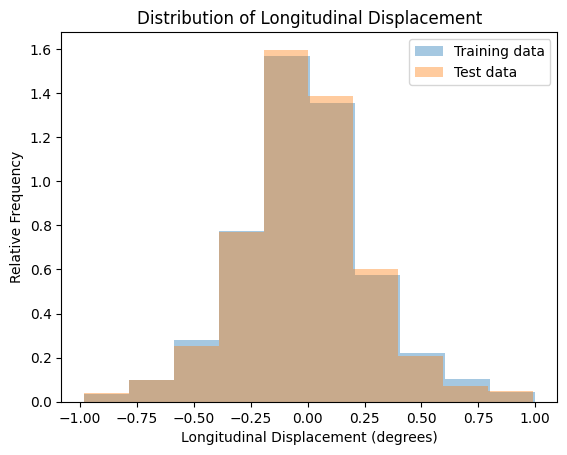

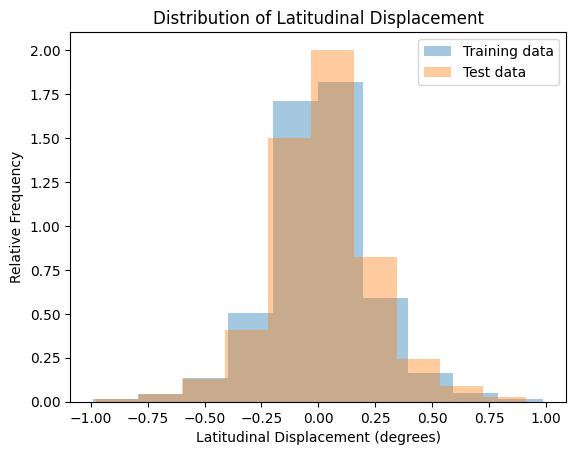

In [37]:
plt.hist(Y_train[:, 1], density=True, alpha=0.4)
plt.hist(Y_test[:, 1], density=True, alpha=0.4)
plt.title('Distribution of Longitudinal Displacement')
plt.xlabel('Longitudinal Displacement (degrees)')
plt.ylabel('Relative Frequency');
plt.legend(['Training data', 'Test data'])
# plt.xlim([-1, 1])
plt.show()

plt.hist(Y_train[:, 0], density = True, alpha=0.4)
plt.hist(Y_test[:, 0], density = True, alpha=0.4)
plt.title('Distribution of Latitudinal Displacement')
plt.xlabel('Latitudinal Displacement (degrees)')
plt.ylabel('Relative Frequency');
plt.legend(['Training data', 'Test data'])
# plt.xlim([-1, 1])
plt.show()

In [38]:
# play with regularization like dropout and batchnorm
# regularization -> lower patience

# look at distributions of train, test, validation before training

# more layers
model = nn.Sequential(
    nn.Linear(X.size()[1], 256),
    nn.LeakyReLU(),
    nn.Linear(256, 128),
    nn.Dropout(.5),
    nn.LeakyReLU(),
    nn.Linear(128, 64),
    nn.LeakyReLU(),
    nn.Linear(64, 32),
    nn.LeakyReLU(),
    nn.Linear(32, 16),
    nn.LeakyReLU(),
    nn.Linear(16, 8),
    nn.LeakyReLU(),
    nn.Linear(8, 2)
).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

criterion = nn.MSELoss()

# define a custom loss
# guess standard deviation and mean
# there is a likelyhood for each value : new loss function
# 1 / likelyhood(observed)

batch_size = 32
early_stopping_patience = 15
best_val_loss = float('inf')
patience_counter = 0

training_losses = []
val_losses = []

# more epochs
for epoch in range(1000):
    model.train()
    
    for i in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        x_batch = X_train[i:i+batch_size].to(device)
        y_batch = Y_train[i:i+batch_size].to(device)
        guess = model(x_batch)
        loss = criterion(guess, y_batch)
        loss.backward()
        optimizer.step()
        
    training_losses.append(loss.cpu().detach().numpy())
    print("training loss:", training_losses[-1])
    
    model.eval()
    with torch.no_grad():
        val_losses.append(criterion(model(X_val.to(device)), Y_val.to(device)).cpu().detach().numpy())
    
    # havent improved in the last 15, quit
    if val_losses[-1] < best_val_loss or epoch<150:
        best_val_loss = val_losses[-1]
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            break

training loss: 0.03433783
training loss: 0.030817807
training loss: 0.03254577
training loss: 0.026489051
training loss: 0.028861437
training loss: 0.028270926
training loss: 0.027559904
training loss: 0.028347425
training loss: 0.025605116
training loss: 0.028867986
training loss: 0.030556424
training loss: 0.030003468
training loss: 0.026959522
training loss: 0.02602362
training loss: 0.0250345
training loss: 0.028076129
training loss: 0.023412732
training loss: 0.023970017
training loss: 0.02668055
training loss: 0.028713832
training loss: 0.022583723
training loss: 0.022915538
training loss: 0.019313324
training loss: 0.025559979
training loss: 0.020077523
training loss: 0.020707019
training loss: 0.022082169
training loss: 0.021648824
training loss: 0.020647768
training loss: 0.025431281
training loss: 0.020048816
training loss: 0.023452234
training loss: 0.022018746
training loss: 0.019683124
training loss: 0.023112515
training loss: 0.02305961
training loss: 0.020144895
training

test loss: 0.035976764


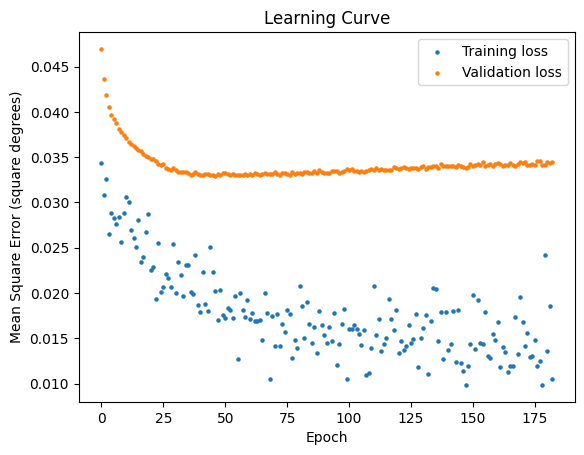

In [39]:
model.eval()
with torch.no_grad():
    print("test loss:", criterion(model(X_test.to(device)), Y_test.to(device)).cpu().detach().numpy())
    
plt.scatter(np.arange(len(training_losses)), training_losses, s=5)
plt.scatter(np.arange(len(val_losses)), val_losses, s=5)
plt.title('Learning Curve')
plt.xlabel('Epoch');
plt.ylabel('Mean Square Error (square degrees)')
plt.legend(['Training loss', 'Validation loss'])
plt.show()

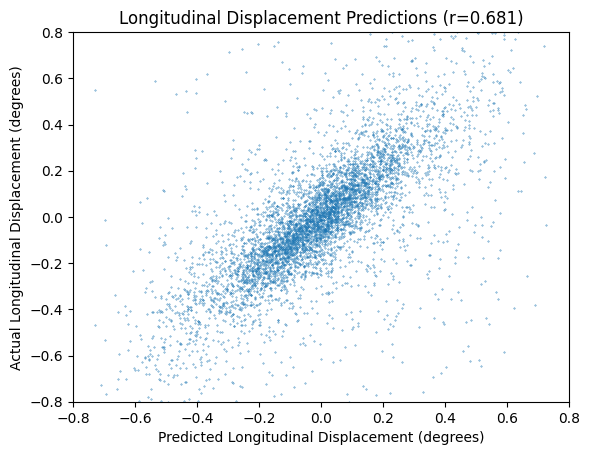

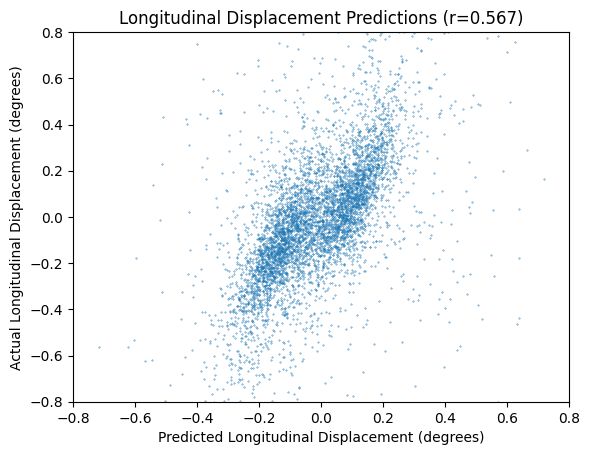

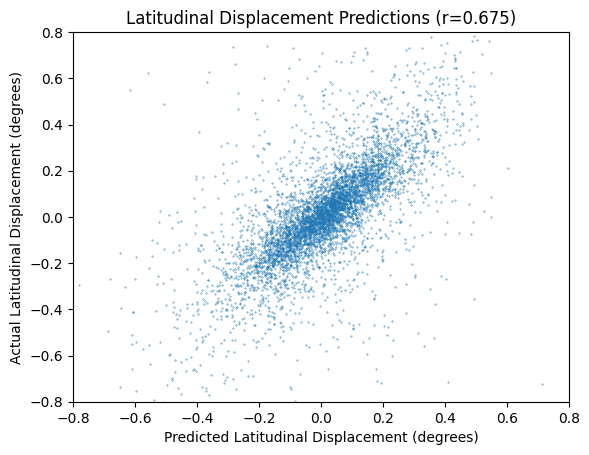

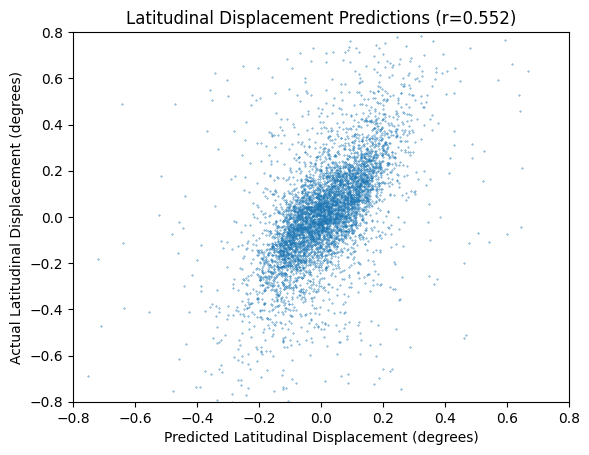

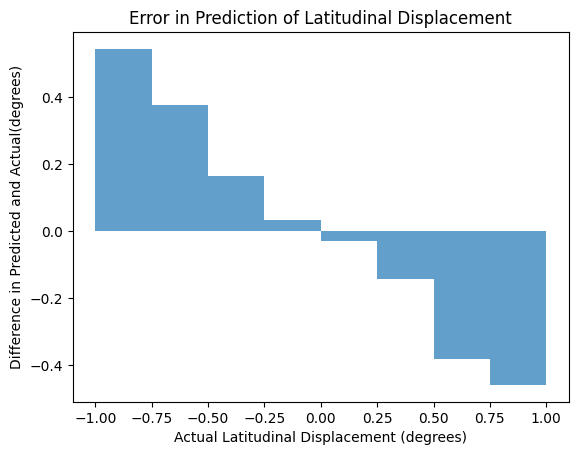

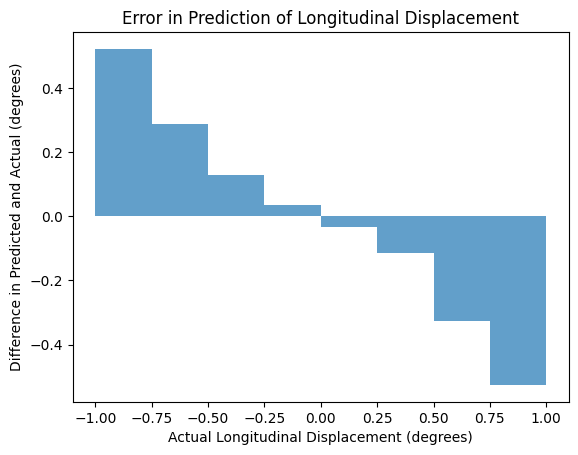

nn mean square error: 0.035976764
linear mean square error: 0.044534545
nn mad: 0.119577594
linear mad: 0.14246717


In [40]:
Y_pred = model(X_test.to(device)).cpu()

plt.scatter(Y_pred.detach().numpy()[:, 1], Y_test.detach().numpy()[:, 1], s=.1)
plt.title(f'Longitudinal Displacement Predictions (r={round(1e3*corr_coef(Y_pred.detach().numpy()[:, 1], Y_test.detach().numpy()[:, 1]))/1e3})')
plt.xlabel('Predicted Longitudinal Displacement (degrees)')
plt.ylabel('Actual Longitudinal Displacement (degrees)')
plt.xlim([-.8, .8])
plt.ylim([-.8, .8])
plt.show()

plt.scatter(Y_pred_linear[:, 1], Y_test.detach().numpy()[:, 1], s=.1)
plt.title(f'Longitudinal Displacement Predictions (r={round(1e3*corr_coef(Y_pred_linear[:, 1], Y_test.detach().numpy()[:, 1]))/1e3})')
plt.xlabel('Predicted Longitudinal Displacement (degrees)')
plt.ylabel('Actual Longitudinal Displacement (degrees)')
plt.xlim([-.8, .8])
plt.ylim([-.8, .8])
plt.show()

plt.scatter(Y_pred.detach().numpy()[:, 0], Y_test.detach().numpy()[:, 0], s=0.1)
plt.title(f'Latitudinal Displacement Predictions (r={round(1e3*corr_coef(Y_pred.detach().numpy()[:, 0], Y_test.detach().numpy()[:, 0]))/1e3})')
plt.xlabel('Predicted Latitudinal Displacement (degrees)')
plt.ylabel('Actual Latitudinal Displacement (degrees)')
plt.xlim([-.8, .8])
plt.ylim([-.8, .8])
plt.show()

plt.scatter(Y_pred_linear[:, 0], Y_test[:, 0], s=.1)
plt.title(f'Latitudinal Displacement Predictions (r={round(1e3*corr_coef(Y_pred_linear[:, 0], Y_test.detach().numpy()[:, 0]))/1e3})')
plt.xlabel('Predicted Latitudinal Displacement (degrees)')
plt.ylabel('Actual Latitudinal Displacement (degrees)')
plt.xlim([-.8, .8])
plt.ylim([-.8, .8])
plt.show()


num_bins = 8
bin_boundaries = np.linspace(-1, 1, num_bins + 1)
bin_boundaries
bins = np.digitize(Y_test.detach()[:, 0], bin_boundaries)
errors = (Y_pred.detach()[:, 0] - Y_test.detach()[:, 0]).numpy()
avg_errors = [np.mean(errors[bins == i]) for i in range(1, num_bins + 1)]
plt.bar(bin_boundaries[:-1], avg_errors, width=np.diff(bin_boundaries), align='edge', alpha=0.7)
plt.xlabel('Actual Latitudinal Displacement (degrees)')
plt.ylabel('Difference in Predicted and Actual(degrees)')
plt.title('Error in Prediction of Latitudinal Displacement')
plt.xticks(bin_boundaries)
plt.show()

bin_boundaries = np.linspace(-1, 1, num_bins + 1)
bin_boundaries
bins = np.digitize(Y_test.detach()[:, 1], bin_boundaries)
errors = (Y_pred.detach()[:, 1] - Y_test.detach()[:, 1]).numpy()
avg_errors = [np.mean(errors[bins == i]) for i in range(1, num_bins + 1)]
plt.bar(bin_boundaries[:-1], avg_errors, width=np.diff(bin_boundaries), align='edge', alpha=0.7)
plt.xlabel('Actual Longitudinal Displacement (degrees)')
plt.ylabel('Difference in Predicted and Actual (degrees)')
plt.title('Error in Prediction of Longitudinal Displacement')
plt.xticks(bin_boundaries)
plt.show()

print('nn mean square error:', np.mean((Y_pred.detach().numpy() - Y_test.detach().numpy())**2))
print('linear mean square error:', np.mean((Y_pred_linear - Y_test.detach().numpy())**2))

print('nn mad:', np.mean(np.abs(Y_pred.detach().numpy() - Y_test.detach().numpy())))
print('linear mad:', np.mean(np.abs(Y_pred_linear - Y_test.detach().numpy())))

In [41]:
# picking a contiguous sequence
just_one = data[data.get('float') == 2902573.0].head(14)

small_test = torch.tensor(just_one[chosen_params[:-2]].to_numpy()).float().to(device)
pred = model(small_test).detach().cpu().numpy()
# pred = model.predict(small_test)
just_one = just_one.assign(pnlat = pred[:, 0] + just_one.get('lat'))
just_one = just_one.assign(pnlon = pred[:, 1] + just_one.get('lon')).reset_index()
just_one.to_csv('just_one.csv')
just_one

,index,Unnamed: 0,folderidx,float,profileidx,year,month,day,lat,lon,...,prev3_dy,prev3_dx,ssh1,ssh2,bath1,bath2,total_disp,errs,pnlat,pnlon
0,112,334,2.0,2902573.0,125.0,2017.0,3.0,3.0,-27.995,-120.065,...,-0.229,-0.273,0.630030,-1.000000,1.000000,0.031732,0.179725,0.104315,-28.078775,-120.228459
1,113,335,2.0,2902573.0,126.0,2017.0,3.0,13.0,-28.145,-120.164,...,-0.136,-0.286,1.000000,-0.779453,1.000000,0.200338,0.132620,0.038036,-28.311510,-120.216493
2,114,336,2.0,2902573.0,127.0,2017.0,3.0,23.0,-28.267,-120.216,...,-0.128,-0.221,0.905253,-1.000000,1.000000,0.119882,0.129124,0.108131,-28.381838,-120.278497
3,115,337,2.0,2902573.0,128.0,2017.0,4.0,3.0,-28.250,-120.344,...,-0.150,-0.099,1.000000,0.031837,1.000000,0.073253,0.122332,0.076334,-28.218432,-120.458424
4,116,338,2.0,2902573.0,129.0,2017.0,4.0,13.0,-28.163,-120.430,...,-0.122,-0.052,-0.189491,-1.000000,1.000000,0.232778,0.281448,0.118526,-28.055336,-120.549286
5,117,339,2.0,2902573.0,130.0,2017.0,4.0,22.0,-27.990,-120.652,...,0.017,-0.128,-0.053026,-1.000000,-0.068842,1.000000,0.366399,0.085205,-27.847961,-120.898068
6,118,340,2.0,2902573.0,131.0,2017.0,5.0,2.0,-27.808,-120.970,...,0.087,-0.086,-0.471371,-1.000000,0.450265,1.000000,0.477546,0.138187,-27.642563,-121.278277
7,119,341,2.0,2902573.0,132.0,2017.0,5.0,12.0,-27.651,-121.421,...,0.173,-0.222,-0.104666,-1.000000,-0.340642,1.000000,0.324728,0.114489,-27.559853,-121.878538
8,120,342,2.0,2902573.0,133.0,2017.0,5.0,22.0,-27.609,-121.743,...,0.182,-0.318,-0.082962,-1.000000,1.000000,0.299927,0.290338,0.034687,-27.595293,-122.035592
9,121,343,2.0,2902573.0,134.0,2017.0,6.0,2.0,-27.623,-122.033,...,0.157,-0.451,0.088565,-1.000000,0.717516,1.000000,0.371469,0.116302,-27.635287,-122.317539


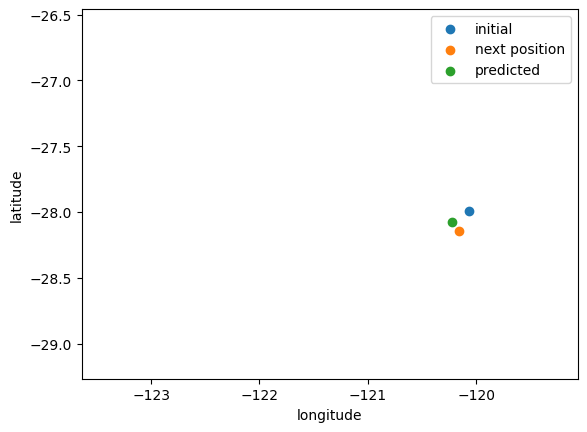

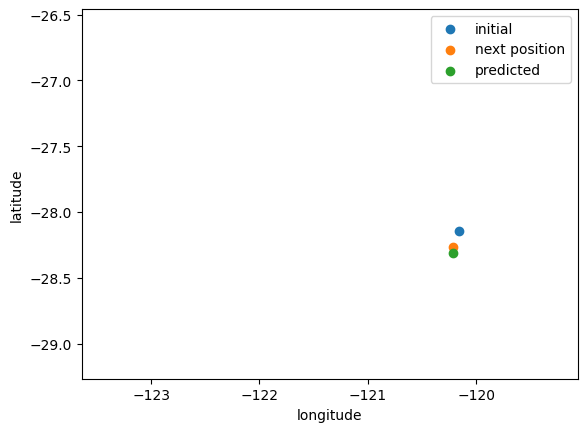

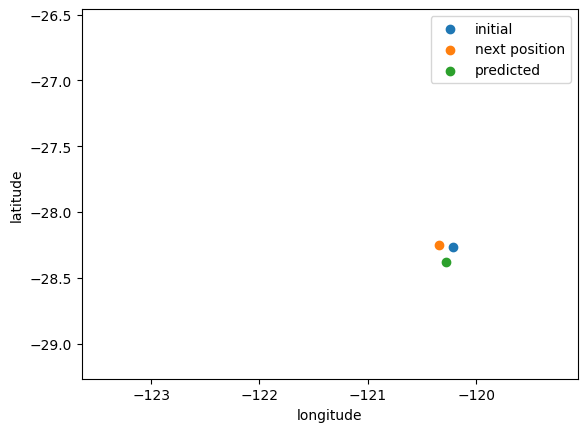

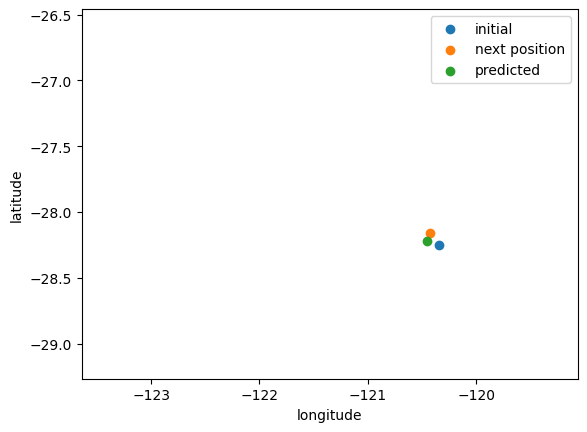

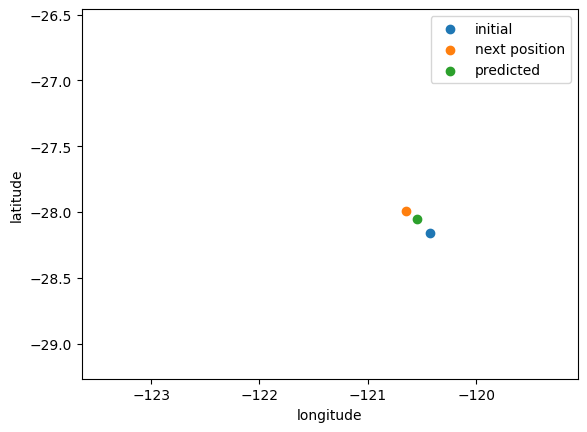

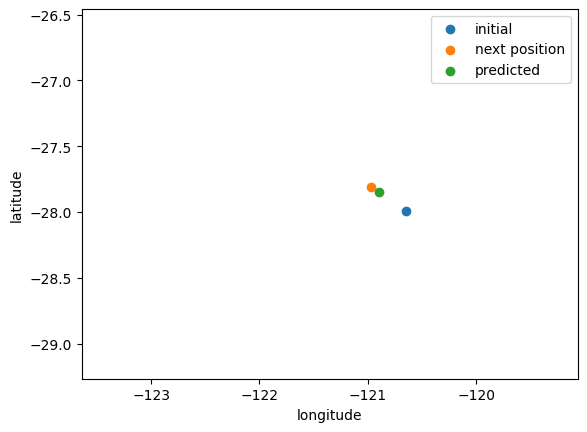

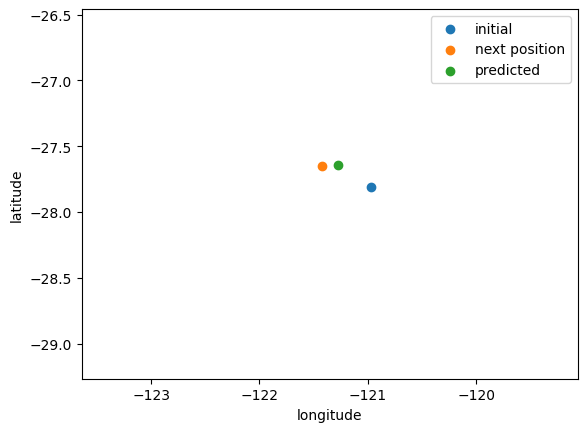

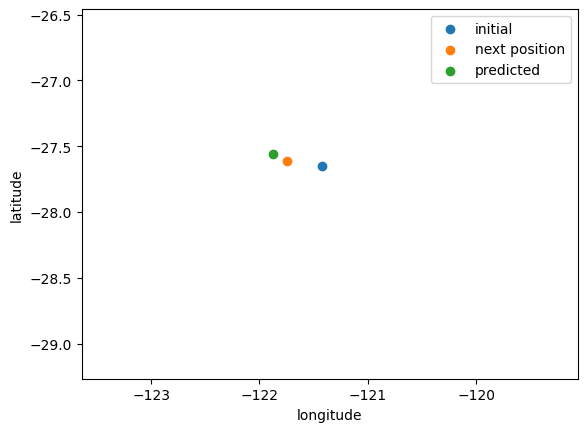

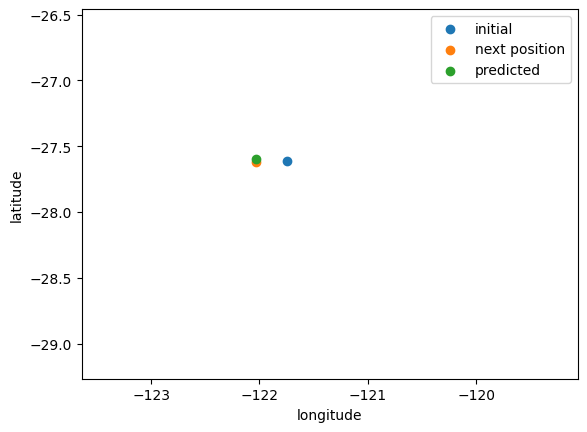

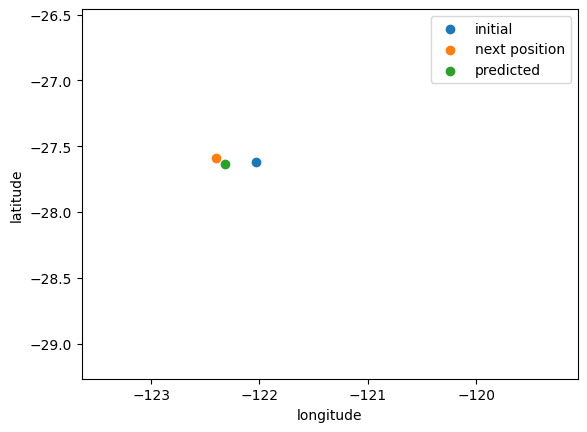

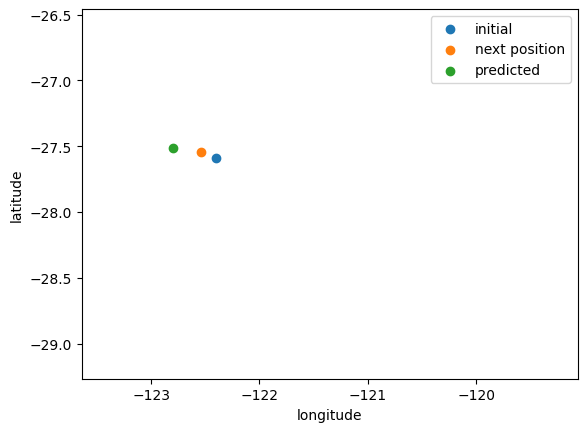

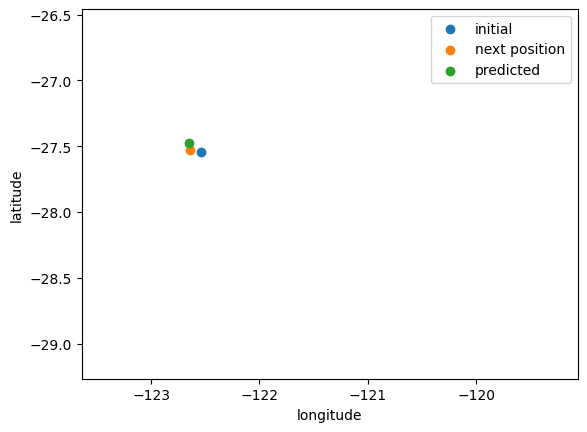

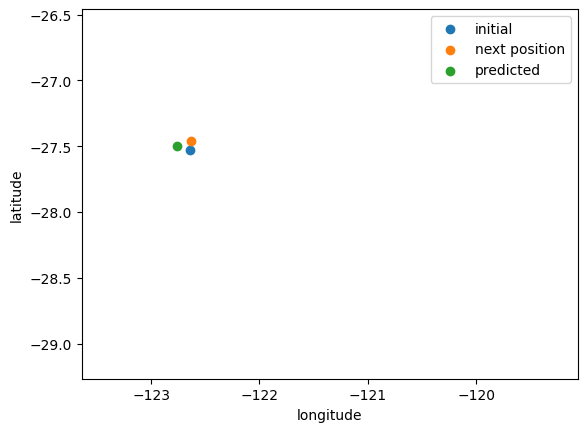

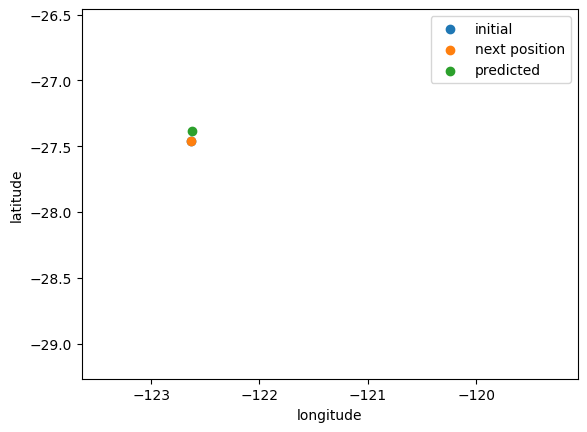

In [42]:
for i in range(just_one.shape[0]):
  y_plot = [just_one.get('lat')[i], just_one.get('nlat')[i], just_one.get('pnlat')[i]]
  x_plot = [just_one.get('lon')[i], just_one.get('nlon')[i], just_one.get('pnlon')[i]]
  for j in range(3):
    plt.scatter(x_plot[j], y_plot[j])
  plt.legend(['initial', 'next position', 'predicted'])
  plt.xlim((just_one.get('lon').min()-1, just_one.get('lon').max()+1))
  plt.ylim((just_one.get('lat').min()-1, just_one.get('lat').max()+1))
  plt.xlabel('longitude')
  plt.ylabel('latitude')
  plt.show()

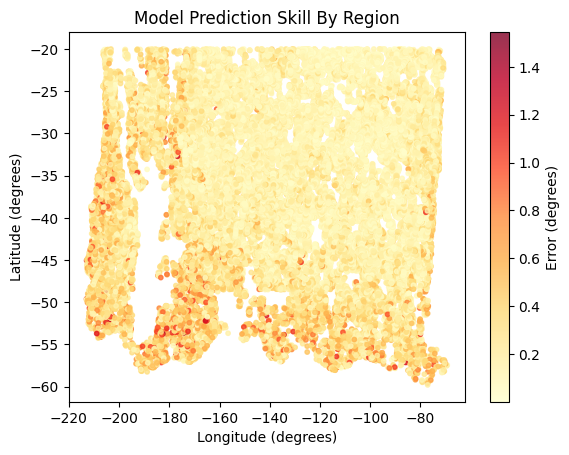

In [42]:
Y2 = final[['dy', 'dx']].to_numpy()
X2 = final.drop(columns=['dy', 'dx']).to_numpy()
X2 = torch.tensor(X2).float().to(device)
Y2 = torch.tensor(Y2).float()
preds = model(X2).cpu()
lat_errs = np.abs(preds.detach()[:, 0] - Y2.detach()[:, 0])
lon_errs = np.abs(preds.detach()[:, 1] - Y2.detach()[:, 1])
total_err = np.sqrt(lat_errs**2 + lon_errs**2)
total_err
lons = data.get('lon')
lons = [x if x < 0 else x-360 for x in lons]
lats = data.get('lat')
plt.scatter(lons, lats, c=total_err, s=10, cmap='YlOrRd', alpha=.8)
plt.title('Model Prediction Skill By Region')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.colorbar(label='Error (degrees)')
plt.show()

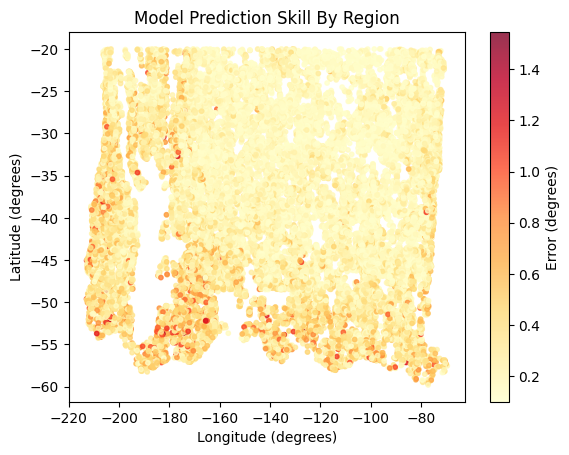

0.5888026765375854

In [48]:
idc = np.array(total_err > .1).tolist()

lons2 = np.array(lons)
lons2 = lons2[idc]
lats2 = np.array(lats)
lats2 = lats2[idc]
total_err2 = total_err[idc]

plt.scatter(lons2, lats2, c=total_err2, s=10, cmap='YlOrRd', alpha=.8)
plt.title('Model Prediction Skill By Region')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.colorbar(label='Error (degrees)')
plt.show()
len(lons2) / len(lons)

[0.046168502, 0.046959598, 0.048544995, 0.0517988]


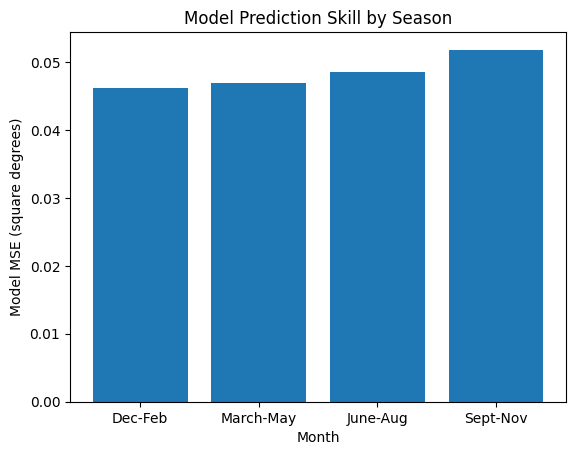

/home/linux/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


errs    0.04836
dtype: float32

In [20]:
data = data.assign(errs=total_err**2)
dec_feb = data[(data.get('month') == 12) | (data.get('month') <= 2)]
march_may = data[(data.get('month') >= 3) & (data.get('month') <= 5)]
june_aug = data[(data.get('month') >= 6) & (data.get('month') <= 8)]
sept_nov = data[(data.get('month') >= 9) & (data.get('month') <= 11)]
by_season = [np.mean(dec_feb.get('errs')), np.mean(march_may.get('errs')), np.mean(june_aug.get('errs')), np.mean(sept_nov.get('errs'))]
print(by_season)
plt.bar(['Dec-Feb', 'March-May', 'June-Aug', 'Sept-Nov'], by_season)
plt.ylabel('Model MSE (square degrees)')
plt.xlabel('Month')
plt.title('Model Prediction Skill by Season')
plt.show()

In [3]:
import pickle
# with open('temp2.pick', 'wb') as f:
#     pickle.dump(model, f)
    
import io

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)

with open('models/expanded_sp_model.pick', 'rb') as f:
    model = CPU_Unpickler(f).load()